In [1]:
# !pip install fasteda
# from fasteda import fast_eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

seed = 42

In [2]:
train = pd.read_csv("./train.csv").drop('id',axis=1)
test = pd.read_csv("./test.csv").drop('id',axis=1)
original = pd.read_csv("./ConcreteStrengthData.csv")

In [3]:
original = original.rename(columns={'CementComponent ':'CementComponent'})

C:\Users\user\AppData\Local\Temp\ipykernel_18276\3909443915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Strength,bins=100)
C:\Users\user\AppData\Local\Temp\ipykernel_18276\3909443915.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original.Strength,bins=100,color='red')


<AxesSubplot: xlabel='Strength', ylabel='Density'>

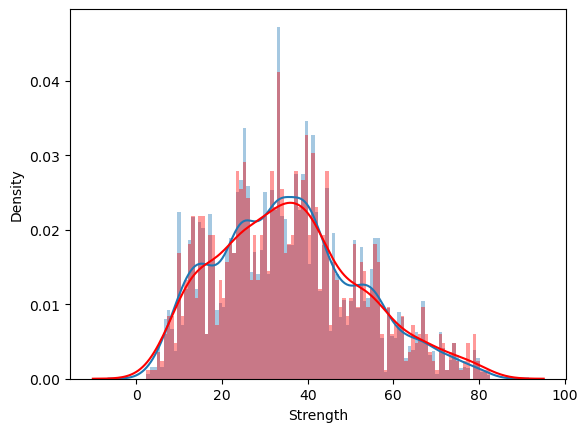

In [4]:
sns.distplot(train.Strength,bins=100)
sns.distplot(original.Strength,bins=100,color='red')

In [5]:
print(original.columns)
print(train.columns)

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [6]:
print(len(train))
print(len(test))

5407
3605


In [7]:
train = pd.concat([train,original],axis=0)
train = train.drop_duplicates().reset_index(drop=True)
train = train[train['AgeInDays'] != 49]
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
train[train.AgeInDays == 1]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
103,500.0,0.0,0.0,192.0,0.0,1125.0,613.0,1,31.54
2174,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,1,52.01
2287,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,1,6.47
2687,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,21.91
3676,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,6.27
6129,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,12.64
6146,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1,6.27


In [9]:
# train.drop('Strength',axis=1).drop_duplicates().columns

In [10]:
# train = pd.DataFrame(train.groupby(list(train.drop('Strength',axis=1).drop_duplicates().columns)).mean('Strength')).reset_index()

In [11]:
print(len(train))
print(len(test))

6411
3605


In [12]:
# train = train.drop(train[(train.AgeInDays == 1) & (train.Strength > 15)].index).reset_index(drop=True)
# train = train.drop(train[(train.AgeInDays == 3) & (train.Strength > 50)].index).reset_index(drop=True)

In [13]:
# test = test.drop_duplicates()

In [14]:
# # Calculate TotalComponentWeight
# # train['TotalComponentWeight'] = train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'] + train['WaterComponent'] + train['SuperplasticizerComponent'] + train['CoarseAggregateComponent'] + train['FineAggregateComponent']

# # Calculate Water-Cement-Ratio (WCR)
# train['WCR'] = train['WaterComponent'] / train['CementComponent']

# # Calculate Aggregate-Ratio (AR)
# train['AR'] = (train['CoarseAggregateComponent'] + train['FineAggregateComponent']) / train['CementComponent']

# # Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
# train['WCPR'] = train['WaterComponent'] / (train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'])

# # Calculate Cement-Age
# train['Cement-Age'] = train['CementComponent'] * train['AgeInDays']

# # Calculate TotalComponentWeight
# # test['TotalComponentWeight'] = test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'] + test['WaterComponent'] + test['SuperplasticizerComponent'] + test['CoarseAggregateComponent'] + test['FineAggregateComponent']

# # Calculate Water-Cement-Ratio (WCR)
# test['WCR'] = test['WaterComponent'] / test['CementComponent']

# # Calculate Aggregate-Ratio (AR)
# test['AR'] = (test['CoarseAggregateComponent'] + test['FineAggregateComponent']) / test['CementComponent']

# # Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
# test['WCPR'] = test['WaterComponent'] / (test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'])

# # Calculate Cement-Age
# test['Cement-Age'] = test['CementComponent'] * test['AgeInDays']

In [15]:
# train['Unknown'] = (train.CoarseAggregateComponent-train.FlyAshComponent) - (train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent + train.WaterComponent + train.SuperplasticizerComponent)
# test['Unknown'] = (test.CoarseAggregateComponent-test.FlyAshComponent) - (test.CementComponent + test.BlastFurnaceSlag + test.FlyAshComponent + test.WaterComponent + test.SuperplasticizerComponent)

In [16]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [17]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 11, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [18]:
test.loc[197,'AgeInDays'] = 14

In [19]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])
# 90,91일 붙이기, 360-365일 붙이기

[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [20]:
train[train.AgeInDays == 91].index

Int64Index([  37,   46,  161,  184,  425,  510,  539,  566,  713,  723,  731,
             785,  826, 1010, 1022, 1274, 1291, 1301, 1313, 1401, 1407, 1447,
            1533, 1592, 1644, 1656, 1713, 1726, 1878, 1921, 2230, 2243, 2349,
            2425, 2426, 2478, 2526, 2727, 2745, 2780, 2859, 2904, 3221, 3323,
            3408, 3508, 3528, 3552, 3602, 3607, 3620, 3842, 3894, 3905, 4018,
            4114, 4137, 4288, 4323, 4326, 4359, 4383, 4437, 4478, 4515, 4516,
            4896, 5092, 5138, 5194, 5299, 5323, 5388, 5550, 5551, 5552, 5553,
            5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564,
            5565, 5566],
           dtype='int64')

In [21]:
train.loc[train[train.AgeInDays == 91].index,'AgeInDays'] = 90
test.loc[test[test.AgeInDays == 91].index,'AgeInDays'] = 90
train.loc[train[train.AgeInDays == 360].index,'AgeInDays'] = 365
test.loc[test[test.AgeInDays == 360].index,'AgeInDays'] = 365

In [22]:
print(len(train))
print(len(test))

6411
3605


In [23]:
# from sklearn.preprocessing import MinMaxScaler
# encoder = MinMaxScaler()
# encoder.fit(np.array([i for i in sorted(train.AgeInDays.unique())]).reshape(-1,1))
# train.AgeInDays = encoder.transform(np.array(train.AgeInDays).reshape(-1,1))
# test.AgeInDays = encoder.transform(np.array(test.AgeInDays).reshape(-1,1))

In [24]:
# from sklearn.preprocessing import StandardScaler

# standard_target = ['CementComponent','WaterComponent',
#                   'CoarseAggregateComponent','FineAggregateComponent']
#                   #'TotalComponentWeight','WCR','AR','WCPR','Cement-Age']

# for i in standard_target:
#     tar = np.array([i for i in train[f'{i}'].append(test[f'{i}']).reset_index().drop('index',axis=1)[f'{i}']]).reshape(-1,1)
#     # tar = np.array([i for i in train[f'{i}']]).reshape(-1,1)
#     encoder = StandardScaler()
#     encoder.fit(tar)
#     train[f'{i}'] = encoder.transform(np.array(train[f'{i}']).reshape(-1,1))
#     test[f'{i}'] = encoder.transform(np.array(test[f'{i}']).reshape(-1,1))

# train = train.reset_index(drop=True)

In [25]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000
mean,295.934846,60.710232,35.575074,184.604757,4.409209,989.259785,771.460443,50.847450,35.415860
std,105.609623,83.995827,56.869697,19.018388,5.770679,77.462298,78.977890,69.238516,16.379638
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,212.500000,0.000000,0.000000,173.500000,0.000000,938.000000,734.300000,7.000000,23.640000
50%,295.800000,0.000000,0.000000,186.000000,0.000000,975.600000,781.000000,28.000000,33.940000
75%,374.000000,129.800000,94.050000,192.000000,8.650000,1047.000000,821.000000,56.000000,45.710000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [26]:
# drop_list = []

# for tar in standard_target:
#     for i in range(len(train)):
#         if abs(train.loc[i,tar]) > 3:
#             drop_list.append(i)

# print('drop :',len(set(drop_list)))
# train = train.drop(sorted(list(set(drop_list)))).reset_index(drop=True)

In [27]:
train = train.sort_values('Strength').reset_index(drop=True)

In [28]:
# tar = ['Cement-Age','AgeInDays','WCPR','SuperplasticizerComponent','WaterComponent']
# test = test.loc[:,tar]
# tar.append('Strength')
# train = train.loc[:,tar]

In [29]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000
mean,295.934846,60.710232,35.575074,184.604757,4.409209,989.259785,771.460443,50.847450,35.415860
std,105.609623,83.995827,56.869697,19.018388,5.770679,77.462298,78.977890,69.238516,16.379638
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,212.500000,0.000000,0.000000,173.500000,0.000000,938.000000,734.300000,7.000000,23.640000
50%,295.800000,0.000000,0.000000,186.000000,0.000000,975.600000,781.000000,28.000000,33.940000
75%,374.000000,129.800000,94.050000,192.000000,8.650000,1047.000000,821.000000,56.000000,45.710000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [30]:
train.corr()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.359081,-0.321087,-0.016706,0.026779,0.036173,-0.326323,0.096578,0.208539
BlastFurnaceSlag,-0.359081,1.000000,-0.183714,0.057002,0.101141,-0.285008,-0.190616,-0.055233,0.064360
FlyAshComponent,-0.321087,-0.183714,1.000000,-0.346103,0.461398,-0.079695,0.109665,-0.138756,0.010561
WaterComponent,-0.016706,0.057002,-0.346103,1.000000,-0.652309,-0.083372,-0.364700,0.242942,-0.140435
SuperplasticizerComponent,0.026779,0.101141,0.461398,-0.652309,1.000000,-0.304774,0.176531,-0.175014,0.227639
CoarseAggregateComponent,0.036173,-0.285008,-0.079695,-0.083372,-0.304774,1.000000,-0.247391,-0.013135,-0.104474
FineAggregateComponent,-0.326323,-0.190616,0.109665,-0.364700,0.176531,-0.247391,1.000000,-0.116588,-0.091540
AgeInDays,0.096578,-0.055233,-0.138756,0.242942,-0.175014,-0.013135,-0.116588,1.000000,0.333774
Strength,0.208539,0.064360,0.010561,-0.140435,0.227639,-0.104474,-0.091540,0.333774,1.000000


<AxesSubplot: >

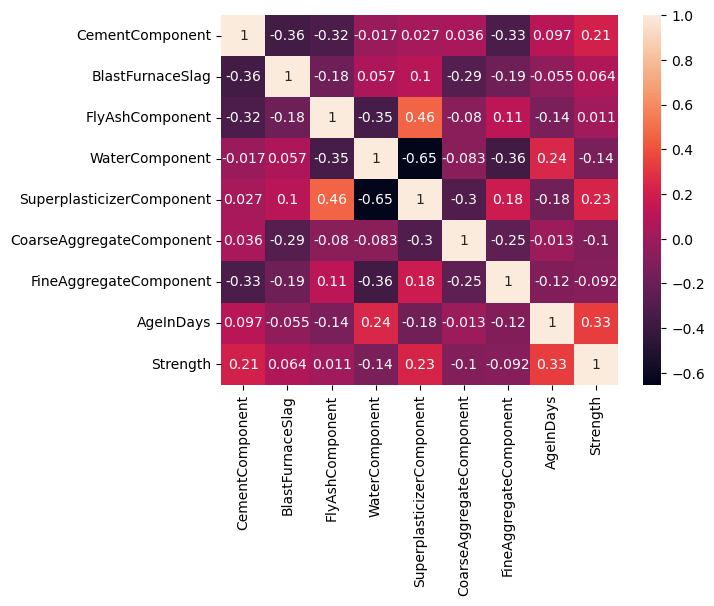

In [31]:
sns.heatmap(train.corr(),annot=True)

In [32]:
# tar = ['AR','AgeInDays','CementComponent']
# train = train.drop(tar,axis=1)
# test = test.drop(tar,axis=1)

In [33]:
# X_train, X_test1, y_train, y_test1 = train_test_split(train.drop('Strength',axis=1), train.Strength, test_size=0.2)

# X, y = X_train, y_train
# X1, y1 = X_test1, y_test1

In [34]:
len(train)

6411

In [35]:
# tar = ['SuperplasticizerComponent','AgeInDays','WCPR','Cement-Age']
# test = test.loc[:,tar]
# tar.append('Strength')
# train = train.loc[:,tar]

In [36]:
# np.random.normal(3,0.5,100) # mu,sigma,n

C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

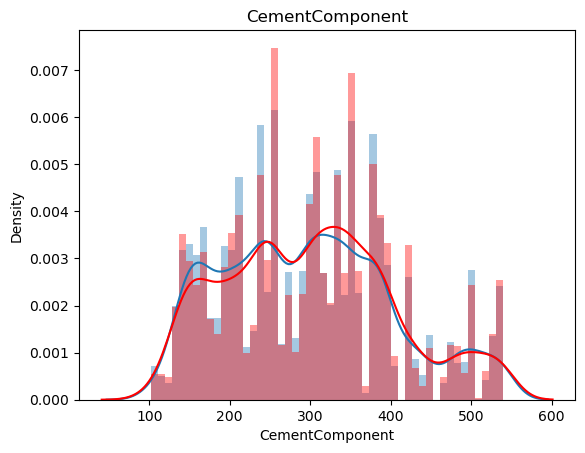

C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

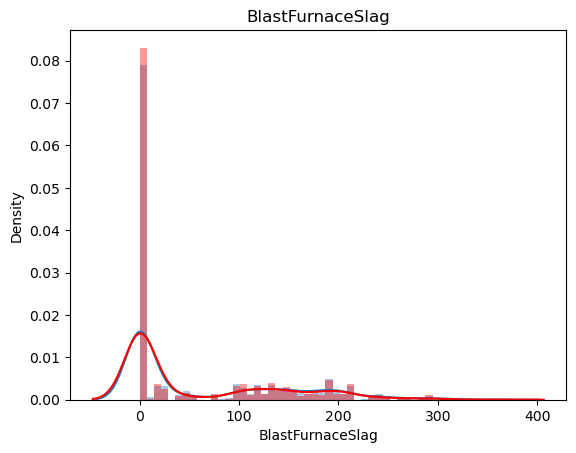

C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

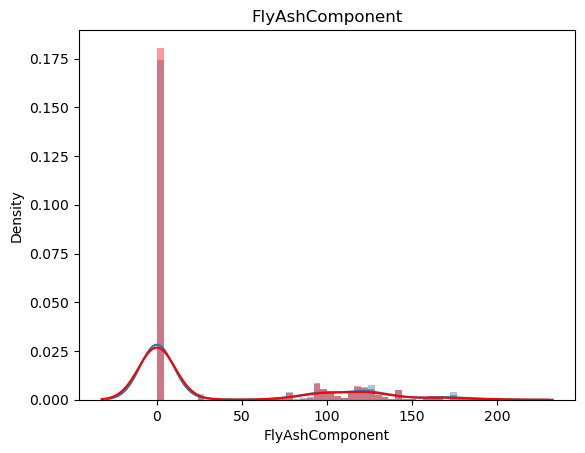

C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

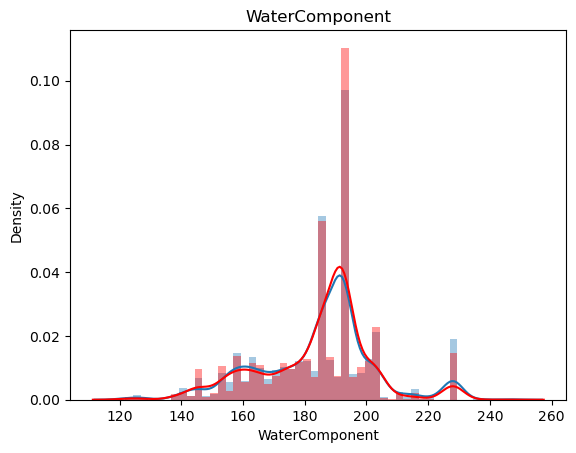

C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

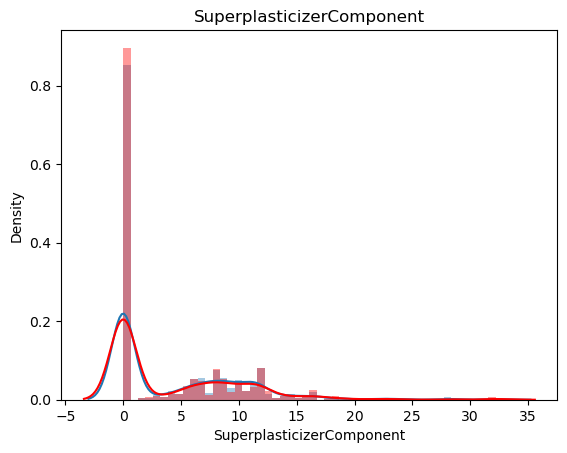

C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

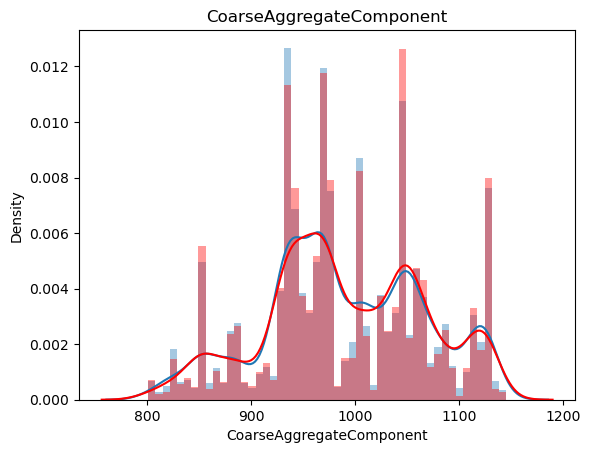

C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

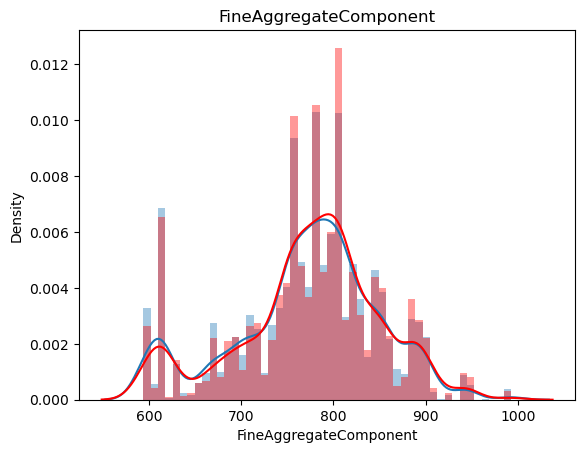

C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_18276\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te

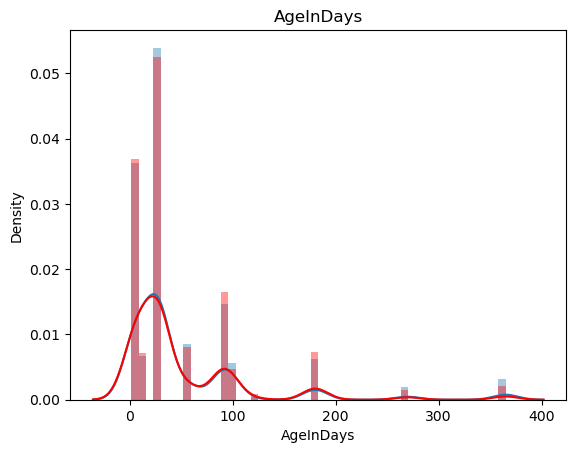

In [37]:
# 콘크리트의 강도는 물과 시멘트의 비율이 낮아지면 증가합니다.
# CementComponent:- Amount of cement is mixed
# BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
# FlyAshComponent:- Amount of FlyAsh is mixed
# WaterComponent:- Amount of water is mixed
# SuperplasticizerComponent:- Amount of Super plasticizer is mixed
# CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
# FineAggregateComponent:- Amount of Coarse Aggregate is mixed
# AgeInDays:- How many days it was left dry
# Strength:- What was the final strength of concrete- (Target)
for i in test.columns:
    plt.title(f'{i}')
    sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    sns.distplot(test[f'{i}'],color='red',bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()


In [38]:
from pycaret import regression
regression.setup(data=train,target='Strength',
                 remove_outliers=True)

,Description,Value
0,session_id,4763
1,Target,Strength
2,Original Data,"(6411, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4262, 15)"


({'lr': <pycaret.containers.models.regression.LinearRegressionContainer at 0x24c5289f6a0>,
  'lasso': <pycaret.containers.models.regression.LassoRegressionContainer at 0x24c5289f820>,
  'ridge': <pycaret.containers.models.regression.RidgeRegressionContainer at 0x24c5289fa30>,
  'en': <pycaret.containers.models.regression.ElasticNetContainer at 0x24c5289fbe0>,
  'lar': <pycaret.containers.models.regression.LarsContainer at 0x24c5289fdf0>,
  'llar': <pycaret.containers.models.regression.LassoLarsContainer at 0x24c5289ff70>,
  'omp': <pycaret.containers.models.regression.OrthogonalMatchingPursuitContainer at 0x24c5297a190>,
  'br': <pycaret.containers.models.regression.BayesianRidgeContainer at 0x24c5297a1c0>,
  'ard': <pycaret.containers.models.regression.AutomaticRelevanceDeterminationContainer at 0x24c5297a670>,
  'par': <pycaret.containers.models.regression.PassiveAggressiveRegressorContainer at 0x24c5297aa00>,
  'ransac': <pycaret.containers.models.regression.RANSACRegressorContainer

In [39]:
best = regression.compare_models(sort='MSE',n_select=4,fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.0932,140.0945,11.8321,0.4719,0.3733,0.3495,0.0620
lr,Linear Regression,9.0921,141.4696,11.8891,0.4666,0.3750,0.3495,0.6860
lar,Least Angle Regression,9.0921,141.4696,11.8891,0.4666,0.3750,0.3495,0.0160
ridge,Ridge Regression,9.0924,141.4706,11.8892,0.4666,0.3750,0.3497,0.3480
br,Bayesian Ridge,9.0928,141.4761,11.8894,0.4666,0.3751,0.3499,0.0040
catboost,CatBoost Regressor,9.1558,145.2329,12.0480,0.4522,0.3762,0.3473,0.4820
lightgbm,Light Gradient Boosting Machine,9.2201,145.9074,12.0758,0.4498,0.3761,0.3489,0.0260
rf,Random Forest Regressor,9.6518,159.8084,12.6375,0.3974,0.3918,0.3608,0.1160
xgboost,Extreme Gradient Boosting,9.6431,161.2279,12.6933,0.3920,0.3955,0.3595,0.0660
ada,AdaBoost Regressor,10.4088,169.1935,13.0053,0.3620,0.4157,0.4253,0.0200


In [40]:
best_tune = [regression.tune_model(i) for i in best]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.0007,139.9921,11.8318,0.4241,0.3781,0.3496
1,9.1683,145.4167,12.0589,0.4216,0.4200,0.4170
2,9.2124,139.4255,11.8079,0.4652,0.3794,0.3551
3,8.9897,144.5281,12.0220,0.4777,0.3782,0.3435
4,9.3456,147.5379,12.1465,0.4378,0.3715,0.3424
5,9.7982,162.0077,12.7282,0.4060,0.3520,0.3104
6,8.6153,122.2003,11.0544,0.5489,0.3566,0.3312
7,8.8845,137.8711,11.7419,0.4634,0.3930,0.3770
8,9.1173,145.1359,12.0472,0.4843,0.3631,0.3388


In [41]:
best_tune

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.5, loss='ls', max_depth=1,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.001, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4763, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True),
 Lars(copy_X=True, eps=0.007, fit_intercept=True, fit_path=True, jitter=None,
      n_nonzero_coefs=500, normalize=True, precompute='auto', random_state=4763,
      verbose=False),
 Ridge(alpha=3.87, copy_X=True, fit_intercept=True, max_ite

In [42]:
target = 'Strength'
features = list(test.columns)

In [43]:
best_tune[0]

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=1,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.001, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4763, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
best_tune[0].feature_importances_

array([0.13014262, 0.02542979, 0.01614197, 0.03039988, 0.09808031,
       0.01653211, 0.02067582, 0.04539738, 0.02862863, 0.01144217,
       0.00119651, 0.29932316, 0.05376058, 0.16744986, 0.0553992 ])

In [45]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 0
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "orange", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()



IndexError: list index out of range

<Figure size 500x600 with 0 Axes>

In [ ]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 1
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "blue", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()



In [ ]:
plt.figure(figsize = (5, 6))
# cat_imp = np.zeros(len(best_tune[0].feature_importances_))
# for model in models[:10]:
#     cat_imp += model.feature_importances_
model_number = 2
cat_imp = best_tune[model_number].feature_importances_
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "red", edgecolor = "#000000")

plt.title(f"{best_tune[model_number]}")
plt.show()


In [ ]:
enssemble = []
for i in range(len(best_tune)):
    best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
    enssemble.append(best_tune[i].predict(test))

In [ ]:
enssemble

In [ ]:
enssemble = np.array(enssemble)
enssemble.mean(axis=0)

In [ ]:
best_tune

In [ ]:
sub = pd.read_csv('./sample_submission.csv')
# md = best_tune[0].fit(train.drop('Strength',axis=1),train['Strength'])
sub['Strength'] = enssemble[2]#md.predict(test)
#enssemble[0] #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sns.distplot(sub['Strength'],bins=100,color='red')
sns.distplot(train.Strength,bins=100)

In [ ]:
preds = []
for i in range(len(best_tune)):
    md = best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
    pred = md.predict(test)
    preds.append(pred)
    
    plt.title(f'{md}')    
    sns.distplot(train.Strength,bins=100)
    sns.distplot(enssemble[i],bins=100,color='red')
    # sns.distplot(density_values)
    plt.show()

# Optimizing coefficients : optuna

In [ ]:
from sklearn.metrics import mean_squared_error
import optuna
 
def coef_objective(trial):
    a = trial.suggest_float('a', 0, 1)
    b = trial.suggest_float('b', 0, 1)
    c = trial.suggest_float('c', 0, 1)
    d = trial.suggest_float('d', 0, 1)
#    e = trial.suggest_float('e', 0, 1)

#     X = X1
#     y = y1
    
#     preds_eval = []
#     for model in modelsCB:
#         preds_eval.append(model.predict(X))
    
#     resCB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsXB:
#         preds_eval.append(model.predict(X))
    
#     resXB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsLB:
#         preds_eval.append(model.predict(X))
    
#     resLB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsSGB:
#         preds_eval.append(model.predict(X))
    
#     resSGB = np.average(np.array(preds_eval),axis=0)
    
#     preds_eval = []
#     for model in modelsLR:
#         preds_eval.append(model.predict(X))
    
#     resLR = np.average(np.array(preds_eval),axis=0)
    
    enssemble = []
    for i in range(len(best_tune)):
        # best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
        enssemble.append(best_tune[i].predict(X1))
        
    # res1 =  (resCB * a + resXB * b + resLB * c + resSGB * d + resLR * e)/(a + b + c + d + e)
    res1 = (enssemble[0]*a + enssemble[1]*b + enssemble[2]*c + enssemble[3]*d)/(a+b+c+d)
    
    res = mean_squared_error(y1, res1, squared=False)

    return res

study = optuna.create_study(direction= 'minimize')
study.optimize(coef_objective, n_trials= 100)

In [ ]:
a = study.best_params['a']
b = study.best_params['b']
c = study.best_params['c']
d = study.best_params['d']

sum_coef = a + b + c + d
a = a / sum_coef
b = b / sum_coef
c = c / sum_coef
d = d / sum_coef

a, b, c, d

In [ ]:
sub = pd.read_csv('./sample_submission.csv')
# md = best_tune[0].fit(train.drop('Strength',axis=1),train['Strength'])
# sub['Strength'] = a*enssemble[0] + b*enssemble[1] + c*enssemble[2] *d*enssemble[3] #md.predict(test)
tp = a*enssemble[0] + b*enssemble[1] + c*enssemble[2] + d*enssemble[3] #md.predict(test)
sub['Strength'] = tp

#enssemble[0] #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sns.distplot(sub['Strength'],bins=100,color='red')
sns.distplot(tp,bins=100,color='red')
sns.distplot(train.Strength,bins=100)

In [56]:
import catboost
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
models = []
val_scores = []

include_orig = True
'''
n_estimators=15000,
max_depth=5,
early_stopping_rounds = 200,
learning_rate=0.005,
one_hot_max_size = 3,
bootstrap_type = "MVS",
l2_leaf_reg = 2,
random_state = 1
'''
# parms = {'iterations': 15728,
#  'od_wait': 2182,
#  'learning_rate': 0.03336852544307129,
#  'reg_lambda': 2.3132945175291226,
#  'subsample': 0.01621008882000844,
#  'random_strength': 25.292157882359646,
#  'depth': 10,
#  'min_data_in_leaf': 10,
#  'leaf_estimation_iterations': 6,
#  'bagging_temperature': 0.01080117689593031,
#  'colsample_bylevel': 0.7579360851684404}

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = catboost.CatBoostRegressor(random_state=42)
    
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
    models.append(model)
    pred = model.predict(X_val)
    score = (mean_squared_error(y_val, pred))**(1/2)
    val_scores.append(score)
    
    print(f'AUC on fold {i}: {score:.4f}')
    
print(f'mean AUC across all folds: {np.mean(val_scores):.4f}')

0it [00:00, ?it/s]

Learning rate set to 0.06582
0:	learn: 15.9298190	test: 15.8877677	best: 15.8877677 (0)	total: 12.6ms	remaining: 12.6s


1it [00:01,  1.30s/it]

999:	learn: 9.5261634	test: 11.5860954	best: 11.4052799 (195)	total: 1.19s	remaining: 0us

bestTest = 11.40527989
bestIteration = 195

Shrink model to first 196 iterations.
AUC on fold 0: 11.4053
Learning rate set to 0.065822
0:	learn: 15.9058021	test: 15.9271379	best: 15.9271379 (0)	total: 13ms	remaining: 13s


2it [00:02,  1.29s/it]

999:	learn: 9.4820019	test: 11.6872046	best: 11.4807988 (149)	total: 1.17s	remaining: 0us

bestTest = 11.48079881
bestIteration = 149

Shrink model to first 150 iterations.
AUC on fold 1: 11.4808
Learning rate set to 0.065822
0:	learn: 15.8525607	test: 16.1268443	best: 16.1268443 (0)	total: 15.8ms	remaining: 15.8s


3it [00:03,  1.30s/it]

999:	learn: 9.4478844	test: 12.1075015	best: 11.9662156 (234)	total: 1.2s	remaining: 0us

bestTest = 11.96621563
bestIteration = 234

Shrink model to first 235 iterations.
AUC on fold 2: 11.9662
Learning rate set to 0.065822
0:	learn: 15.9041566	test: 15.9906641	best: 15.9906641 (0)	total: 19.4ms	remaining: 19.4s


4it [00:05,  1.33s/it]

999:	learn: 9.4871865	test: 12.1689379	best: 11.6845292 (89)	total: 1.26s	remaining: 0us

bestTest = 11.68452922
bestIteration = 89

Shrink model to first 90 iterations.
AUC on fold 3: 11.6845
Learning rate set to 0.065822
0:	learn: 15.9775915	test: 15.6892952	best: 15.6892952 (0)	total: 27.7ms	remaining: 27.7s


5it [00:06,  1.33s/it]

999:	learn: 9.4994264	test: 11.6320442	best: 11.4438509 (208)	total: 1.23s	remaining: 0us

bestTest = 11.44385093
bestIteration = 208

Shrink model to first 209 iterations.
AUC on fold 4: 11.4439
mean AUC across all folds: 11.5961


In [57]:
val_scores

[11.4052799254615,
 11.48079884412377,
 11.966215581849047,
 11.684529207902518,
 11.44385096290803]

In [58]:
sub = pd.read_csv('./sample_submission.csv')
# md = best_tune[0].fit(train.drop('Strength',axis=1),train['Strength'])
# sub['Strength'] = a*enssemble[0] + b*enssemble[1] + c*enssemble[2] *d*enssemble[3] #md.predict(test)
tp = np.array([i.predict(test) for i in models]).mean(axis=0)
sub['Strength'] = tp

#enssemble[0] #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')

<AxesSubplot: ylabel='Density'>

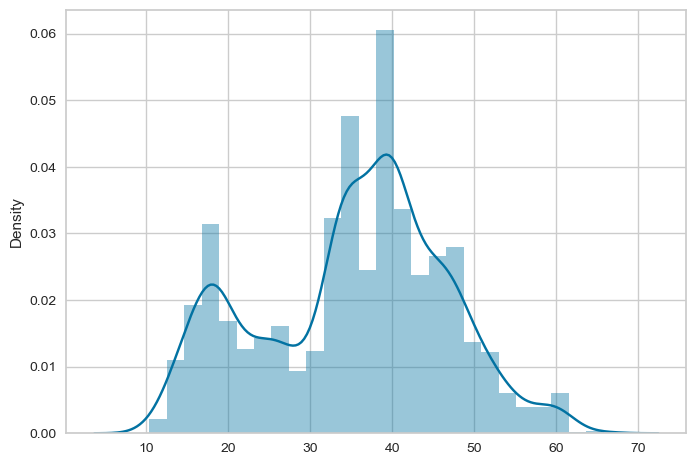

In [59]:
sns.distplot(sub)